# MNIST
[THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

Train classifiers using sklearn to recognize digit images

---

# Table of Content
- [Setup](#setup)
- [Load Data](#load-data)
- [Training](#training)
    - [Naive Bayes](#naive-bayes)
    - [SVM](#svm)
    - [KNN](#knn)

---

<a name='setup'></a>
# Setup

In [1]:
%matplotlib inline

In [2]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

---

<a name='load-data'></a>
# Load Data

In [3]:
from sklearn.datasets import load_digits

In [4]:
dataset = load_digits()

In [5]:
dataset

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
images = dataset.images
labels = dataset.target

In [7]:
print('images.shape: ', images.shape)
print('labels.shape: ', labels.shape)
print('First image:\n', images[0])
print('First label:', labels[0])

images.shape:  (1797, 8, 8)
labels.shape:  (1797,)
First image:
 [[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
First label: 0


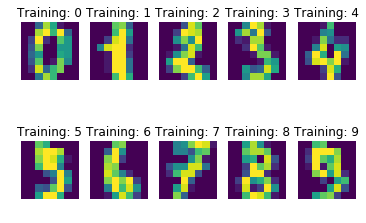

In [8]:
images_and_labels = list(zip(images, labels))
display_num = 10
for index, (image, label) in enumerate(images_and_labels[:display_num]):
    plt.subplot(2, math.floor(display_num/2), index + 1)
    plt.axis('off')
    plt.imshow(image, interpolation='nearest')
    plt.title('Training: %i' % label)

### Split training data and testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
flat_images = images.reshape((1797, 64))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(flat_images, labels, random_state=42)

In [12]:
print('X_train[0]: ', X_train[0])
print('y_train[0]: ', y_train[0])

X_train[0]:  [  0.   0.   2.  15.  15.  16.  11.   0.   0.   0.   8.  16.  11.   3.   0.
   0.   0.   0.  13.   9.   0.   0.   0.   0.   0.   5.  16.   3.   9.  11.
   3.   0.   0.  10.  15.  15.  16.  16.  11.   0.   0.   6.  16.  10.   7.
  16.   5.   0.   0.   0.   3.   4.  15.   8.   0.   0.   0.   0.   4.  15.
   7.   0.   0.   0.]
y_train[0]:  5


---

<a name='training'></a>
# Training

<a name='naive-bayes'></a>
## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
%%time

clf = GaussianNB()
clf.fit(X_train, y_train)

CPU times: user 2.7 ms, sys: 1.3 ms, total: 4 ms
Wall time: 2.93 ms


In [15]:
sampled_image_label = random.sample(list(zip(flat_images, labels)), 1)[0]

print('Image:\n', sampled_image_label[0].reshape(8, 8))
print('Label: ', sampled_image_label[1])

Image:
 [[  0.   0.   5.  15.   7.   0.   0.   0.]
 [  0.   0.  14.  16.  16.   5.   0.   0.]
 [  0.   0.  13.  14.  14.  15.   0.   0.]
 [  0.   0.   3.  11.  14.  16.   3.   0.]
 [  0.   0.   0.   0.   6.  16.   2.   0.]
 [  0.   0.   0.   0.   4.  16.   7.   0.]
 [  0.   0.   0.   1.  11.  16.   6.   0.]
 [  0.   0.   4.  15.  16.  10.   0.   0.]]
Label:  9


In [16]:
predict_value = clf.predict(sampled_image_label[0].reshape(1, -1))

print('Predict Value: ', predict_value[0])
print('Expected Value: ', sampled_image_label[1])

Predict Value:  9
Expected Value:  9


In [17]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.85555555555555551

#### Reference
[1.9. Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

<a name='svm'></a>
## SVM

In [18]:
from sklearn import svm

In [19]:
%%time

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

CPU times: user 28.9 ms, sys: 1.87 ms, total: 30.8 ms
Wall time: 29 ms


In [20]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.98222222222222222

### Deploy an RBF Kernel

In [21]:
%%time

clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train, y_train)

CPU times: user 283 ms, sys: 4.39 ms, total: 287 ms
Wall time: 285 ms


In [22]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.56444444444444442

### Find the best parameter

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
svc = svm.SVC()
parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [1, 10, 100]}

In [25]:
%%time

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

CPU times: user 3.89 s, sys: 23 ms, total: 3.91 s
Wall time: 3.97 s


In [26]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.98888888888888893

#### Reference
- [1.4. Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html)
- [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<a name='knn'></a>
## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
%%time

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

CPU times: user 2.48 ms, sys: 1.3 ms, total: 3.78 ms
Wall time: 2.51 ms


In [30]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.99333333333333329

#### Reference
[1.6. Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)